# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Slope (Heating Rate): 0.942 °C/min
Slope (SI units): 0.01570 K/s


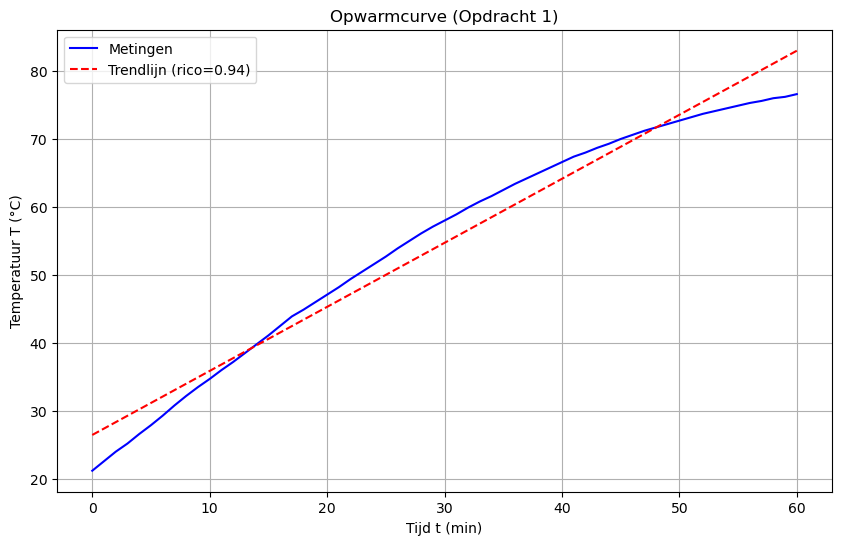

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Data loading

file_path = 'tempmetingen-b84ff6c3f35c50c85eee9e228e1dc8ce.csv'
df = pd.read_csv(file_path, delimiter=';')

# 2. Data slicing 
# Rename columns for easier access if necessary, usually index 0 is time, 1 is temp
#t_min=file[:,0]
t_min = df.iloc[:, 0]
T_celsius = df.iloc[:, 1]

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_min, T_celsius, 'b-', label='Metingen')
plt.title('Opwarmcurve (Opdracht 1)')
plt.xlabel('Tijd t (min)')
plt.ylabel('Temperatuur T (°C)')
plt.grid(True)

# 4. Calculate Slope (Linear Regression)
# We select the linear part, e.g., from t=0 to t=70 (before boiling starts)
linear_part = df[df.iloc[:, 0] <= 70] 

coef = np.polyfit(linear_part.iloc[:, 0], linear_part.iloc[:, 1], 1)
slope_min = coef[0] # degrees per minute
slope_sec = slope_min / 60 # degrees per second

print(f"Slope (Heating Rate): {slope_min:.3f} °C/min")
print(f"Slope (SI units): {slope_sec:.5f} K/s")

# Add trendline to plot
plt.plot(t_min, coef[0]*t_min + coef[1], 'r--', label=f'Trendlijn (rico={slope_min:.2f})')
plt.legend()
plt.show()

# Ex1-Interpretatie van het grafiek

Blauwe lijn: 
 Deze laten zien hoe de temperatuur stijdgt. Tussen de interval 0 en ongeveer 8 minuten is dit lineair (constante opwarming). Naarmate het water warmer wordt en naar de richting van de kookpunt gaat, zal de grafiek afvalkken omdat er energie verloren gaat aan de omgeving en aan verdamping. Dit zorgt voor de afnemende stijding. 


Rode stippellijn: 
 De trendlijn stelt de theoretische temperatuur voor als alle toegevoegde energie in het opwarmen van het water zou gaan zitten, zonder warmteverlies aan de omgeving en de zonder verdamping. In werkelijkheid blijven de metingen onder deze lijn zodra verliezen en verdamping een rol gaan spelen. 


# Ex2-Energie equilibruim
Om te bepalen of de toegevoerde energie klopt met de opwarming en verdamping, moet je een energiebalans opstellen.

Gegevens:
- Massa maatbeker ($m_b$): $820,8 \text{ g}$
- Massa water start ($m_{w,start}$): $1292,9 - 820,8 = 472,1 \text{ g}$
- Massa water eind ($m_{w,eind}$): $1274,9 - 820,8 = 454,1 \text{ g}$
- Verdampt water ($\Delta m$): $1292,9 - 1274,9 = \mathbf{18,0 \text{ g}}$
- Opwarmsnelheid (helling): $0,01570 \text{ K/s}$

Stappen voor de berekening:

 Stap 1: Bepaal het effectieve vermogen ($P$): We nemen aan dat in het lineaire deel (de eerste 70 min) alle energie in de opwarming gaat.
 
  - Aanname: $c_{water} = 4,18 \text{ J/gK}$.

  - Aanname: De maatbeker warmt ook mee op. Omdat de maatbeker zwaar is ($820,8 \text{ g}$), is de warmtecapaciteit hiervan belangrijk. Als we aannemen dat het glas is ($c_{glas} \approx 0,84 \text{ J/gK}$):
   $$C_{totaal} = (m_w \cdot c_w) + (m_b \cdot c_b)$$$$C_{totaal} \approx (472,1 \cdot 4,18) + (820,8 \cdot 0,84) \approx 1973 + 689 = 2662 \text{ J/K}$$

  - Vermogen $P = C_{totaal} \cdot \text{helling} \approx 2662 \cdot 0,01570 \approx \mathbf{41,8 \text{ Watt}}$.


 Stap 2: Bereken de benodigde energie voor verdamping ($Q_{verdamping}$):
 
 - Verdampingswarmte water ($L_v$): $2260 \text{ J/g}$ (binas waarde).

 - $Q_{verdamping} = \Delta m \cdot L_v = 18,0 \cdot 2260 = \mathbf{40.680 \text{ J}}$. 

 Stap 3: Vergelijking (Conclusie):
 
 Je moet kijken naar de periode waarin de temperatuur niet meer stijgt (het "plateau" of de afwijking van de trendlijn).
 
 - Als het experiment bijvoorbeeld 20 minuten (1200 seconden) heeft geduurd tijdens de kookfase/verdampingsfase, is de toegevoerde energie $E_{in} = 41,8 \text{ W} \cdot 1200 \text{ s} \approx 50.160 \text{ J}$.
 
 - Vergelijk $E_{in}$ ($50.160 \text{ J}$) met $Q_{verdamping}$ ($40.680 \text{ J}$).
 
 - Antwoord: De totale toegevoerde energie zal waarschijnlijk hoger zijn dan de berekende energie voor opwarming en verdamping. Het verschil is te verklaren door warmteverlies aan de omgeving (convectie en straling), vooral bij hoge temperaturen. De aanname dat alle energie in het water zit, geldt niet meer zodra het water heet is.


# Ex3 : Aanbevelingen

Om het thermodynamische proces beter te onderzoeken (en het "gat" in de energiebalans te dichten), zijn de volgende verbeteringen aan te raden:

- Isolatie aanbrengen: De maatbeker is nu waarschijnlijk open en ongeïsoleerd. Door de beker in te pakken in isolatiemateriaal (bijv. piepschuim of wol) wordt het warmteverlies naar de zijkanten beperkt.

- Deksel gebruiken: Veel warmte en massa gaat verloren door verdamping voordat het kookpunt is bereikt. Een deksel (eventueel met een gaatje voor de thermometer en het verwarmingselement) houdt de damp en warmte binnen.

- Vermogen meten: In plaats van het vermogen te schatten uit de helling, kun een joulemeter of een voltmeter en ampèremeter aansluiten op het verwarmingselement. Zo word de exact waarde van de elektrische energie ($E = U \cdot I \cdot t$) die erin gaat, onafhankelijk van de watermassa.

- Roeren: Gebruik een roerder om te zorgen dat de temperatuur door het hele water gelijk is, zodat de meting van de sensor representatief is voor de hele massa.

